In [1]:
import pandas as pd
import numpy as np

SEED = 20
np.random.seed(SEED)

uri = './movies.csv'
dados = pd.read_csv(uri, sep=',', engine='python')
dados.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [2]:
dados.columns = ['filme_id', 'titulo', 'generos']
dados.head()

,filme_id,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
generos = dados.generos.str.get_dummies()
dados_filmes = pd.concat([dados, generos], axis = 1)
dados_filmes.head()

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

generos_escalados = scaler.fit_transform(generos)
generos_escalados.shape

(9742, 20)

In [5]:
from sklearn.cluster import KMeans

modelo = KMeans(n_clusters = 3)

modelo.fit(generos_escalados)

#print('Grupos {}'.format(modelo.labels_))
print(f'Grupos {format(modelo.labels_)}')

Grupos [0 0 2 ... 2 0 2]


In [6]:
print(generos.columns)
print(modelo.cluster_centers_)

Index(['(no genres listed)', 'Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
       'War', 'Western'],
      dtype='object')
[[-0.05917995 -0.03492844  0.8872201   2.26615479  2.48300776  0.22653485
  -0.31719912 -0.20234663 -0.59247546  0.87229871 -0.09492563 -0.27475884
   0.24503388  0.38189377 -0.1341527  -0.27553859  0.1255665  -0.47271817
  -0.169617   -0.08361204]
 [-0.05917995  0.68153928  0.17612079 -0.23097748 -0.26749005 -0.55677286
   0.54990253 -0.21569264 -0.13334504  0.00371301  0.23823744  0.46431384
   0.16109552 -0.18021635  0.47952635 -0.33576968  0.50538741  1.25867564
  -0.11166692 -0.06307362]
 [ 0.03520955 -0.29358277 -0.21584998 -0.25260184 -0.27045122  0.20891241
  -0.1917372   0.12624344  0.15104556 -0.13787227 -0.08970486 -0.16081224
  -0.10895519  0.01942586 -0.18944809  0.19036126 -0.2413603  -0.47843444
 

In [7]:
grupos = pd.DataFrame(modelo.cluster_centers_,
            columns = generos.columns)
grupos.head()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,-0.05918,-0.034928,0.887220,2.266155,2.483008,0.226535,-0.317199,-0.202347,-0.592475,0.872299,-0.094926,-0.274759,0.245034,0.381894,-0.134153,-0.275539,0.125566,-0.472718,-0.169617,-0.083612
1,-0.05918,0.681539,0.176121,-0.230977,-0.267490,-0.556773,0.549903,-0.215693,-0.133345,0.003713,0.238237,0.464314,0.161096,-0.180216,0.479526,-0.335770,0.505387,1.258676,-0.111667,-0.063074
2,0.03521,-0.293583,-0.215850,-0.252602,-0.270451,0.208912,-0.191737,0.126243,0.151046,-0.137872,-0.089705,-0.160812,-0.108955,0.019426,-0.189448,0.190361,-0.241360,-0.478434,0.075488,0.040734


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001EC515DD400>,
      dtype=object)

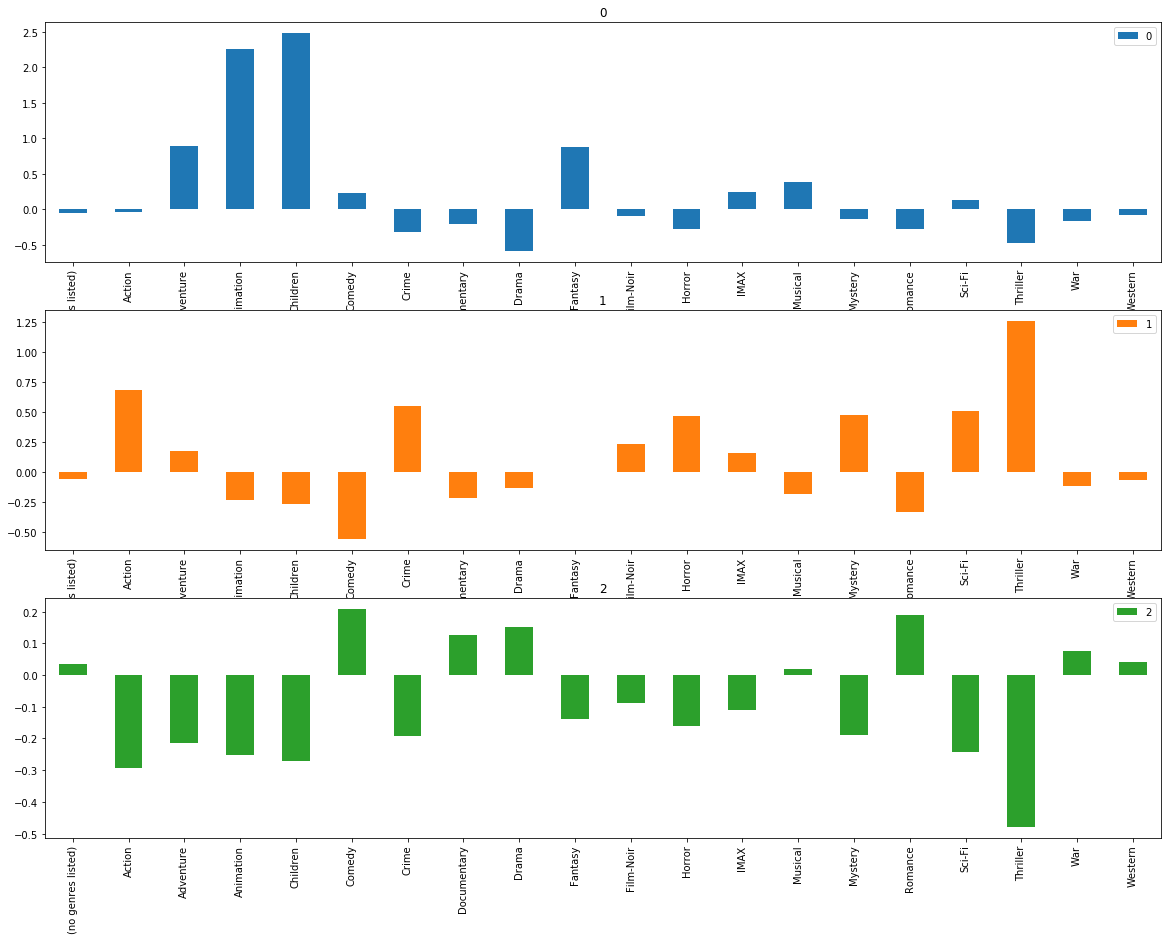

In [8]:
grupos.transpose().plot.bar(figsize = (20,15), subplots = True, sharex = False)

In [9]:
grupo = 0
dados_filmes[modelo.labels_ == grupo].sample(10)

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
7902,95147,Dragon Ball: Sleeping Princess in Devil's Cast...,Action|Adventure|Animation|Children,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2979,3991,102 Dalmatians (2000),Children|Comedy,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
5236,8580,Into the Woods (1991),Adventure|Comedy|Fantasy|Musical,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
7374,79139,"Sorcerer's Apprentice, The (2010)",Action|Adventure|Children|Comedy|Fantasy,0,1,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
6127,43560,Nanny McPhee (2005),Children|Comedy|Fantasy,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
8119,101074,"Legend of Sleepy Hollow, The (1949)",Animation|Comedy|Horror|Musical,0,0,0,1,0,1,0,...,0,1,0,1,0,0,0,0,0,0
7199,72692,Mickey's Once Upon a Christmas (1999),Animation|Comedy|Fantasy,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6504,53460,Surf's Up (2007),Animation|Children|Comedy,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2572,3440,Teenage Mutant Ninja Turtles III (1993),Action|Adventure|Children|Comedy|Fantasy,0,1,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4647,6946,Looney Tunes: Back in Action (2003),Action|Animation|Children|Fantasy,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
from sklearn.datasets import make_blobs

dados, _ = make_blobs(n_samples=1000, n_features=2, random_state=7)
dados = pd.DataFrame(dados, columns=['coluna1', 'coluna2'])
dados.head()

,coluna1,coluna2
0,9.829632,0.763094
1,-9.723548,4.100788
2,10.403457,1.761671
3,-2.253417,4.660486
4,13.059859,-0.004112


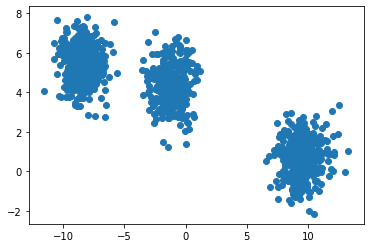

In [11]:
import matplotlib.pyplot as plt

plt.scatter(x=dados.coluna1, y=dados.coluna2)

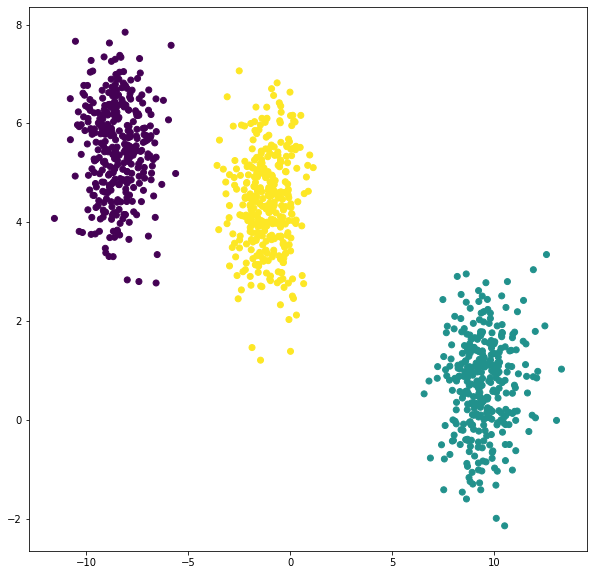

In [12]:
modelo2 = KMeans(n_clusters=3)
grupos = modelo2.fit_predict(dados)

plt.figure(figsize=(10,10))
plt.scatter(x=dados.coluna1, y=dados.coluna2, 
            c=grupos,
           cmap='viridis')

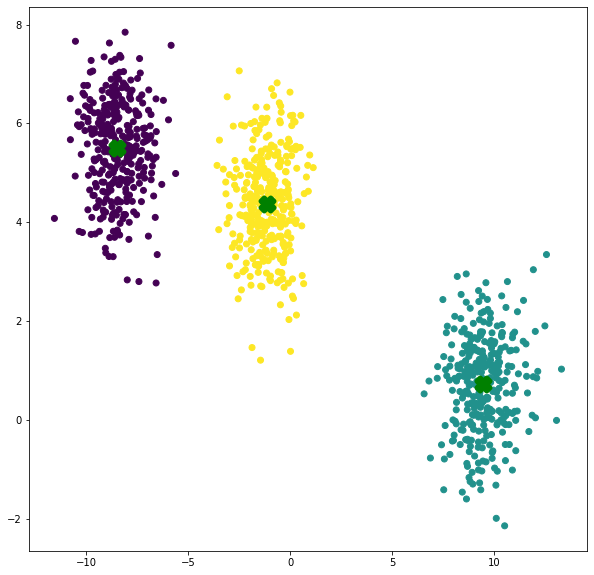

In [13]:
centroides = modelo2.cluster_centers_

plt.figure(figsize=(10,10))
plt.scatter(dados.coluna1, dados.coluna2,
            c=grupos,
           cmap='viridis')
plt.scatter(centroides[:, 0], centroides[:, 1],
           marker='X', s=169, linewidths=5,
           color='g', zorder=8)

In [14]:
from sklearn.manifold import TSNE

tsne = TSNE()

visualizacao = tsne.fit_transform(generos_escalados)
visualizacao

array([[ 25.391148 ,  22.251665 ],
       [-50.377357 ,  25.054155 ],
       [-33.083767 , -23.061031 ],
       ...,
       [-26.681839 ,   5.366566 ],
       [ 47.947235 ,  11.920328 ],
       [ 12.143168 ,  -0.9963889]], dtype=float32)

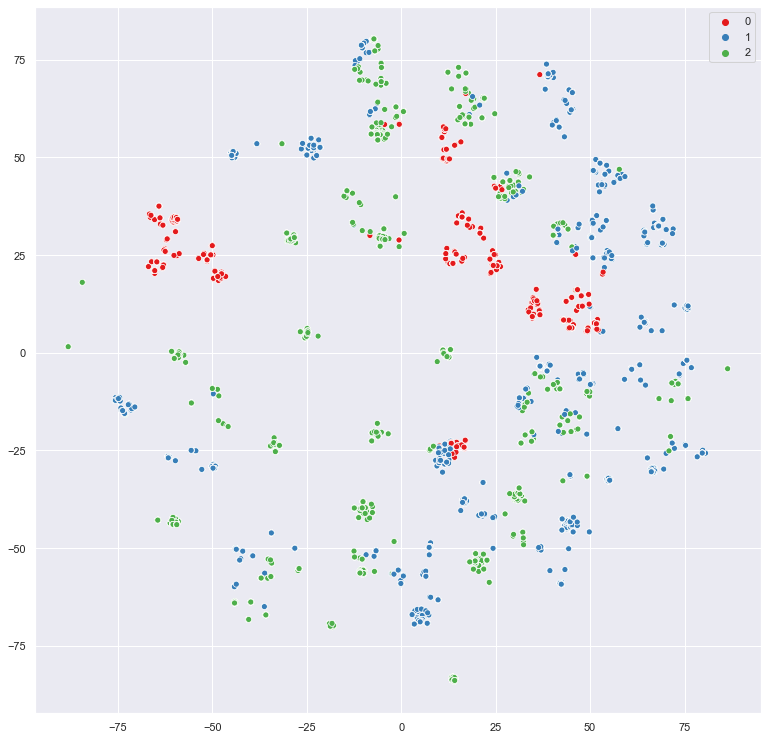

In [15]:
import seaborn as sns

sns.set(rc={'figure.figsize':(13,13)})
sns.scatterplot(x = visualizacao[:,0], y = visualizacao[:,1], 
                hue = modelo.labels_, palette = sns.color_palette('Set1',3))

In [16]:
modelo3 = KMeans(n_clusters = 20)
modelo3.fit(generos_escalados)

grupos3 = pd.DataFrame(modelo3.cluster_centers_, columns = generos.columns)
grupos3.head()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,-0.05918,-0.456038,-0.357392,-0.238898,-0.260936,-0.599974,-0.338134,4.597924,-0.808616,-0.277127,-0.094926,-0.318096,-0.128397,-0.188419,-0.229602,-0.429675,-0.334435,-0.479140,-0.078470,-0.132065
1,-0.05918,-0.364098,-0.274558,-0.258679,-0.270451,-0.792126,-0.374632,-0.217489,1.110807,-0.216367,-0.094926,-0.334055,-0.128397,-0.188419,-0.249986,-0.442633,-0.334435,-0.151998,-0.202020,-0.132065
2,-0.05918,0.128485,0.249380,-0.183231,-0.125281,-0.303544,-0.189027,-0.188127,-0.189021,-0.159926,-0.094926,-0.192025,-0.128397,0.146687,-0.172239,-0.113141,-0.192533,-0.244737,0.112129,7.572010
3,-0.05918,-0.179276,1.146314,3.865793,3.697524,0.280470,-0.296295,-0.217489,-0.744982,0.803105,-0.094926,-0.321821,-0.128397,0.801623,-0.203109,-0.234036,-0.102205,-0.491259,-0.164137,-0.132065
4,-0.05918,1.729754,1.381626,-0.258679,-0.270451,0.082046,-0.264875,-0.217489,-0.624694,0.901636,-0.094926,-0.262064,-0.128397,-0.188419,-0.219336,-0.273769,-0.334435,-0.375850,-0.202020,-0.132065


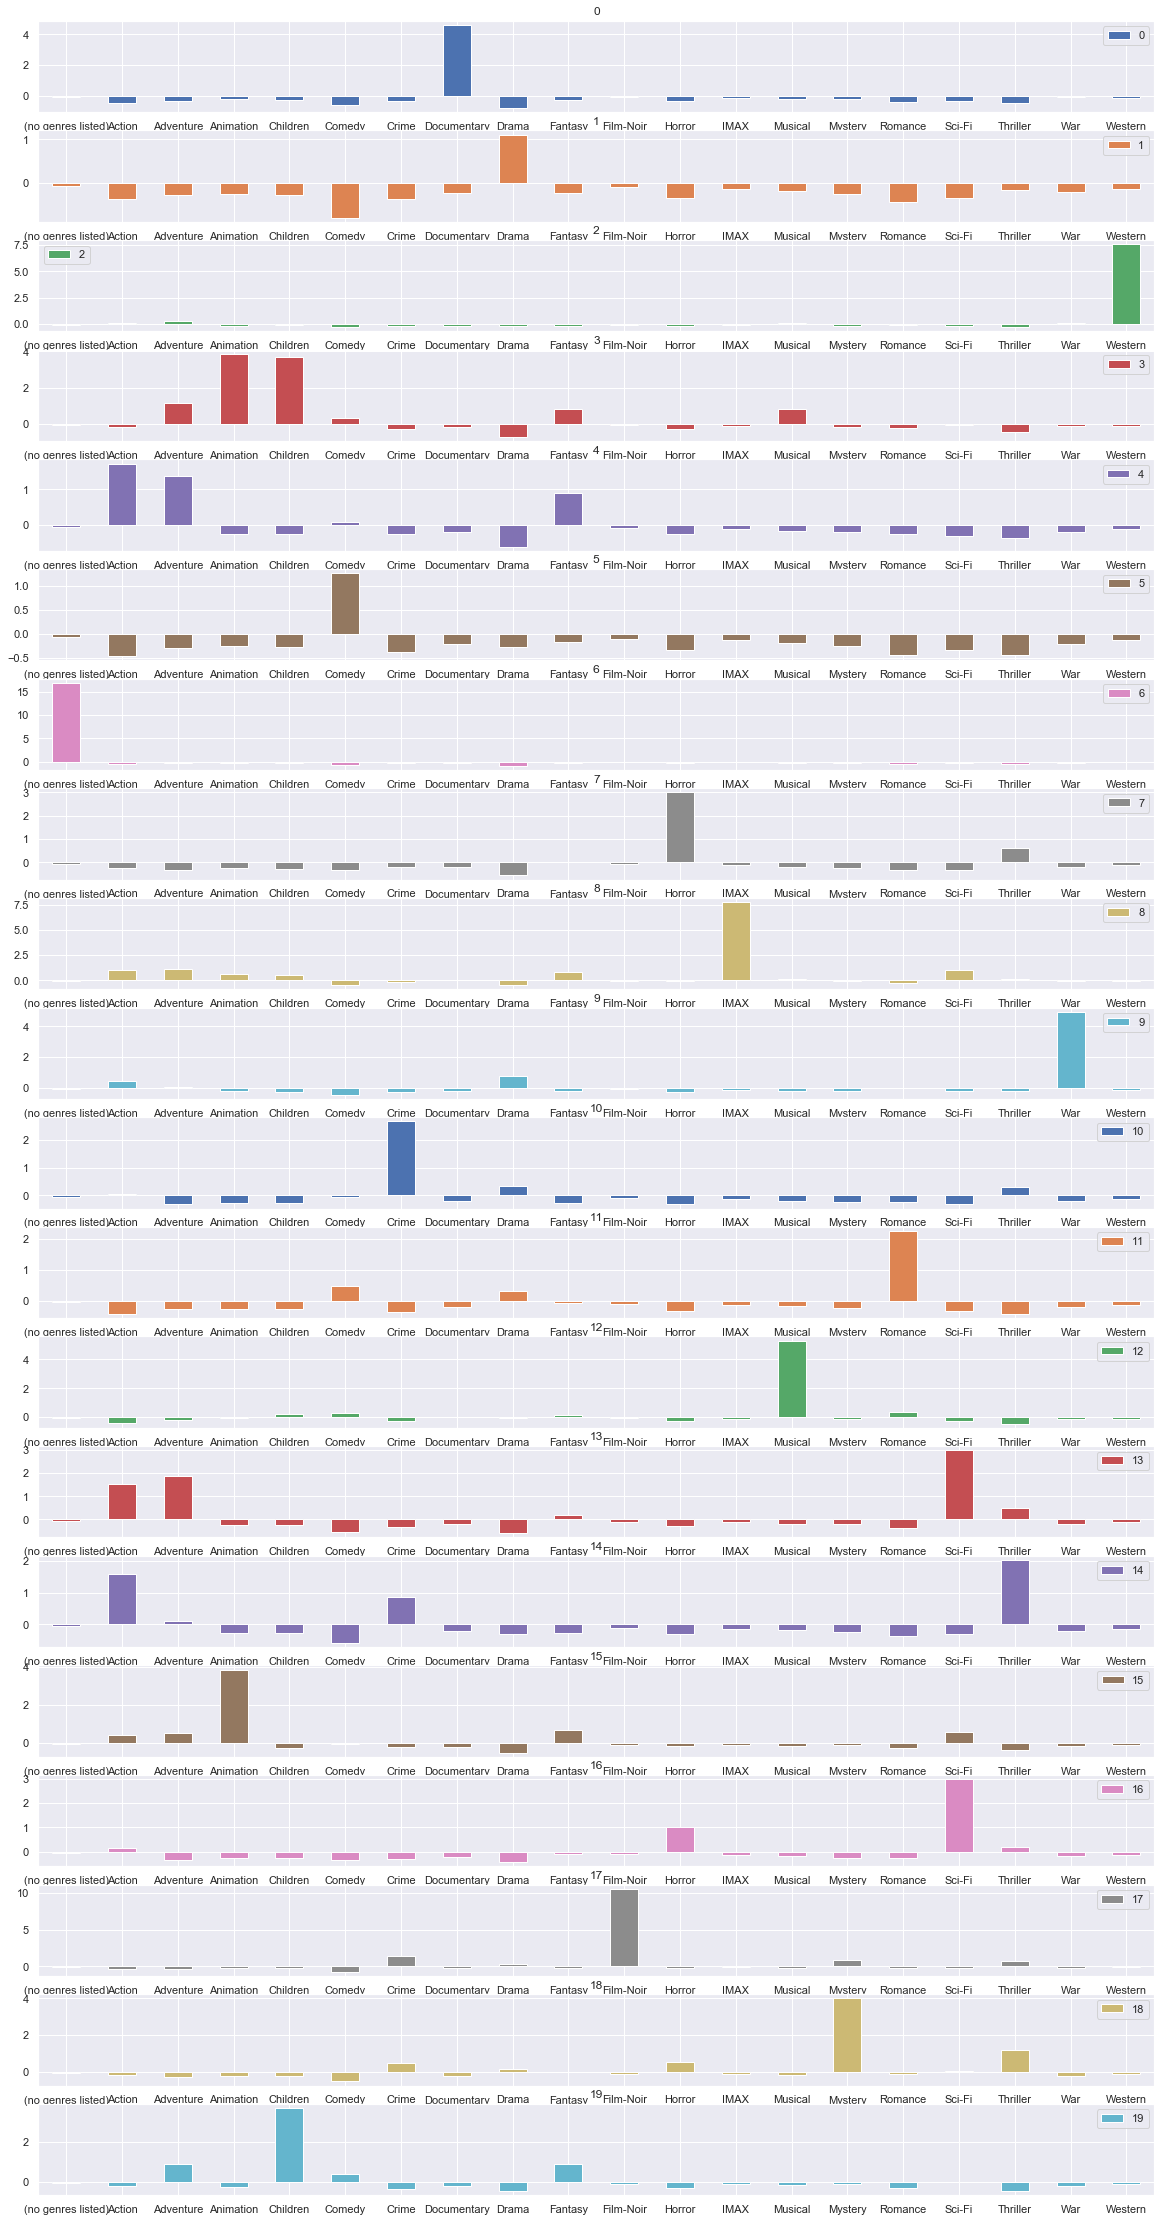

In [17]:
graph = grupos3.transpose().plot.bar(figsize = (20,40), subplots = True, sharex = False, rot = 0)

In [18]:
grupo = 15
dados_filmes[modelo3.labels_ == grupo].sample(10)

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
5858,32657,"Man Who Planted Trees, The (Homme qui plantait...",Animation|Drama,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8547,115664,The Book of Life (2014),Adventure|Animation|Romance,0,0,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6973,66335,Afro Samurai: Resurrection (2009),Animation,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9683,183897,Isle of Dogs (2018),Animation|Comedy,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7402,80083,Dragon Ball Z: Dead Zone (Doragon bÃ´ru Z 1: O...,Action|Adventure|Animation|Fantasy|Sci-Fi,0,1,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7100,70533,Evangelion: 1.0 You Are (Not) Alone (Evangerio...,Action|Animation|Sci-Fi,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7327,77709,"Sky Crawlers, The (Sukai kurora) (2008)",Adventure|Animation|Drama,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8725,126577,"Daddy, I'm A Zombie (2012)",Animation|Comedy|Fantasy,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7961,96281,ParaNorman (2012),Adventure|Animation|Comedy,0,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9173,148978,Blue Exorcist: The Movie (2012),Animation|Fantasy|Horror|Mystery,0,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0


In [19]:
def kmeans(clusters, generos_filmes):
    modelo = KMeans(n_clusters = clusters)
    modelo.fit(generos)
    return [clusters, modelo.inertia_]

In [20]:
kmeans(20, generos_escalados)

[20, 6162.239628945052]

In [21]:
kmeans(3, generos_escalados)

[3, 12493.247611154406]

In [22]:
resultado = [kmeans(ngrupos, generos_escalados) for ngrupos in range(3, 41)]
resultado    

[[3, 12429.18144209558],
 [4, 11544.461158407283],
 [5, 10723.105485026399],
 [6, 10139.924497466376],
 [7, 9536.908146604124],
 [8, 8940.619504107914],
 [9, 8594.18798848022],
 [10, 8226.408193361505],
 [11, 7864.114253659646],
 [12, 7541.025537334664],
 [13, 7307.177369083764],
 [14, 7166.8185318725],
 [15, 6833.962057872306],
 [16, 6739.762616662023],
 [17, 6498.546491889029],
 [18, 6443.53764021254],
 [19, 6309.5589636351015],
 [20, 6180.270076085673],
 [21, 5972.356202601069],
 [22, 5921.237669935513],
 [23, 5740.317875570987],
 [24, 5572.697338404643],
 [25, 5557.090128990314],
 [26, 5502.69748720321],
 [27, 5398.9479945713565],
 [28, 5303.953476305633],
 [29, 5257.783282006137],
 [30, 5029.442816170272],
 [31, 4972.420506876039],
 [32, 4992.9242616420015],
 [33, 4902.193255428996],
 [34, 4866.921513433612],
 [35, 4730.256166381182],
 [36, 4660.07470713701],
 [37, 4610.521817194459],
 [38, 4504.125694134527],
 [39, 4511.934910828204],
 [40, 4530.567371584062]]

In [23]:
resultado = pd.DataFrame(resultado, columns = ['grupos','inertia'])
resultado

,grupos,inertia
0,3,12429.181442
1,4,11544.461158
2,5,10723.105485
3,6,10139.924497
4,7,9536.908147
5,8,8940.619504
6,9,8594.187988
7,10,8226.408193
8,11,7864.114254
9,12,7541.025537


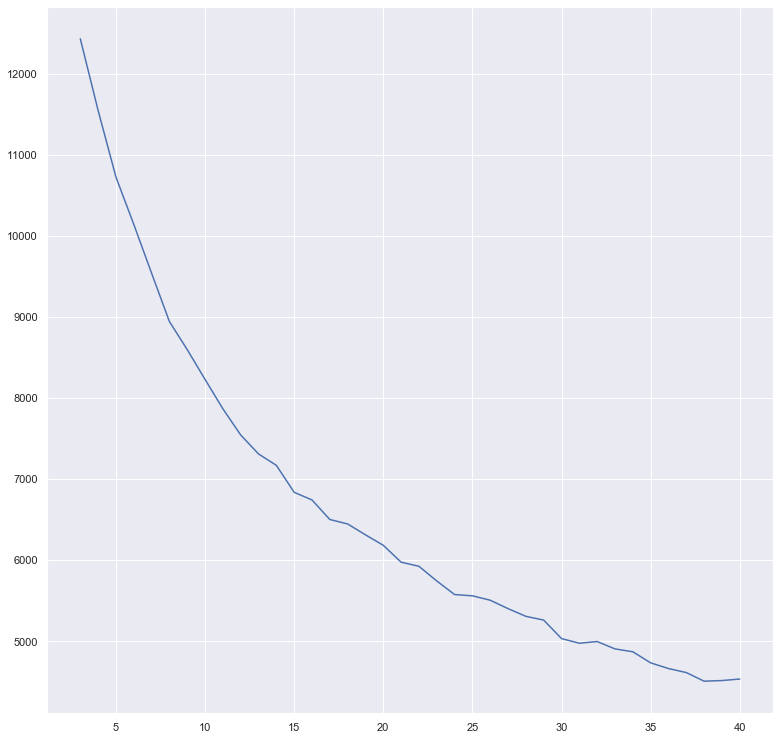

In [24]:
graph = plt.plot(resultado.grupos , resultado.inertia)

In [37]:
modelo4 = KMeans(n_clusters = 17)
modelo4.fit(generos_escalados)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=17, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

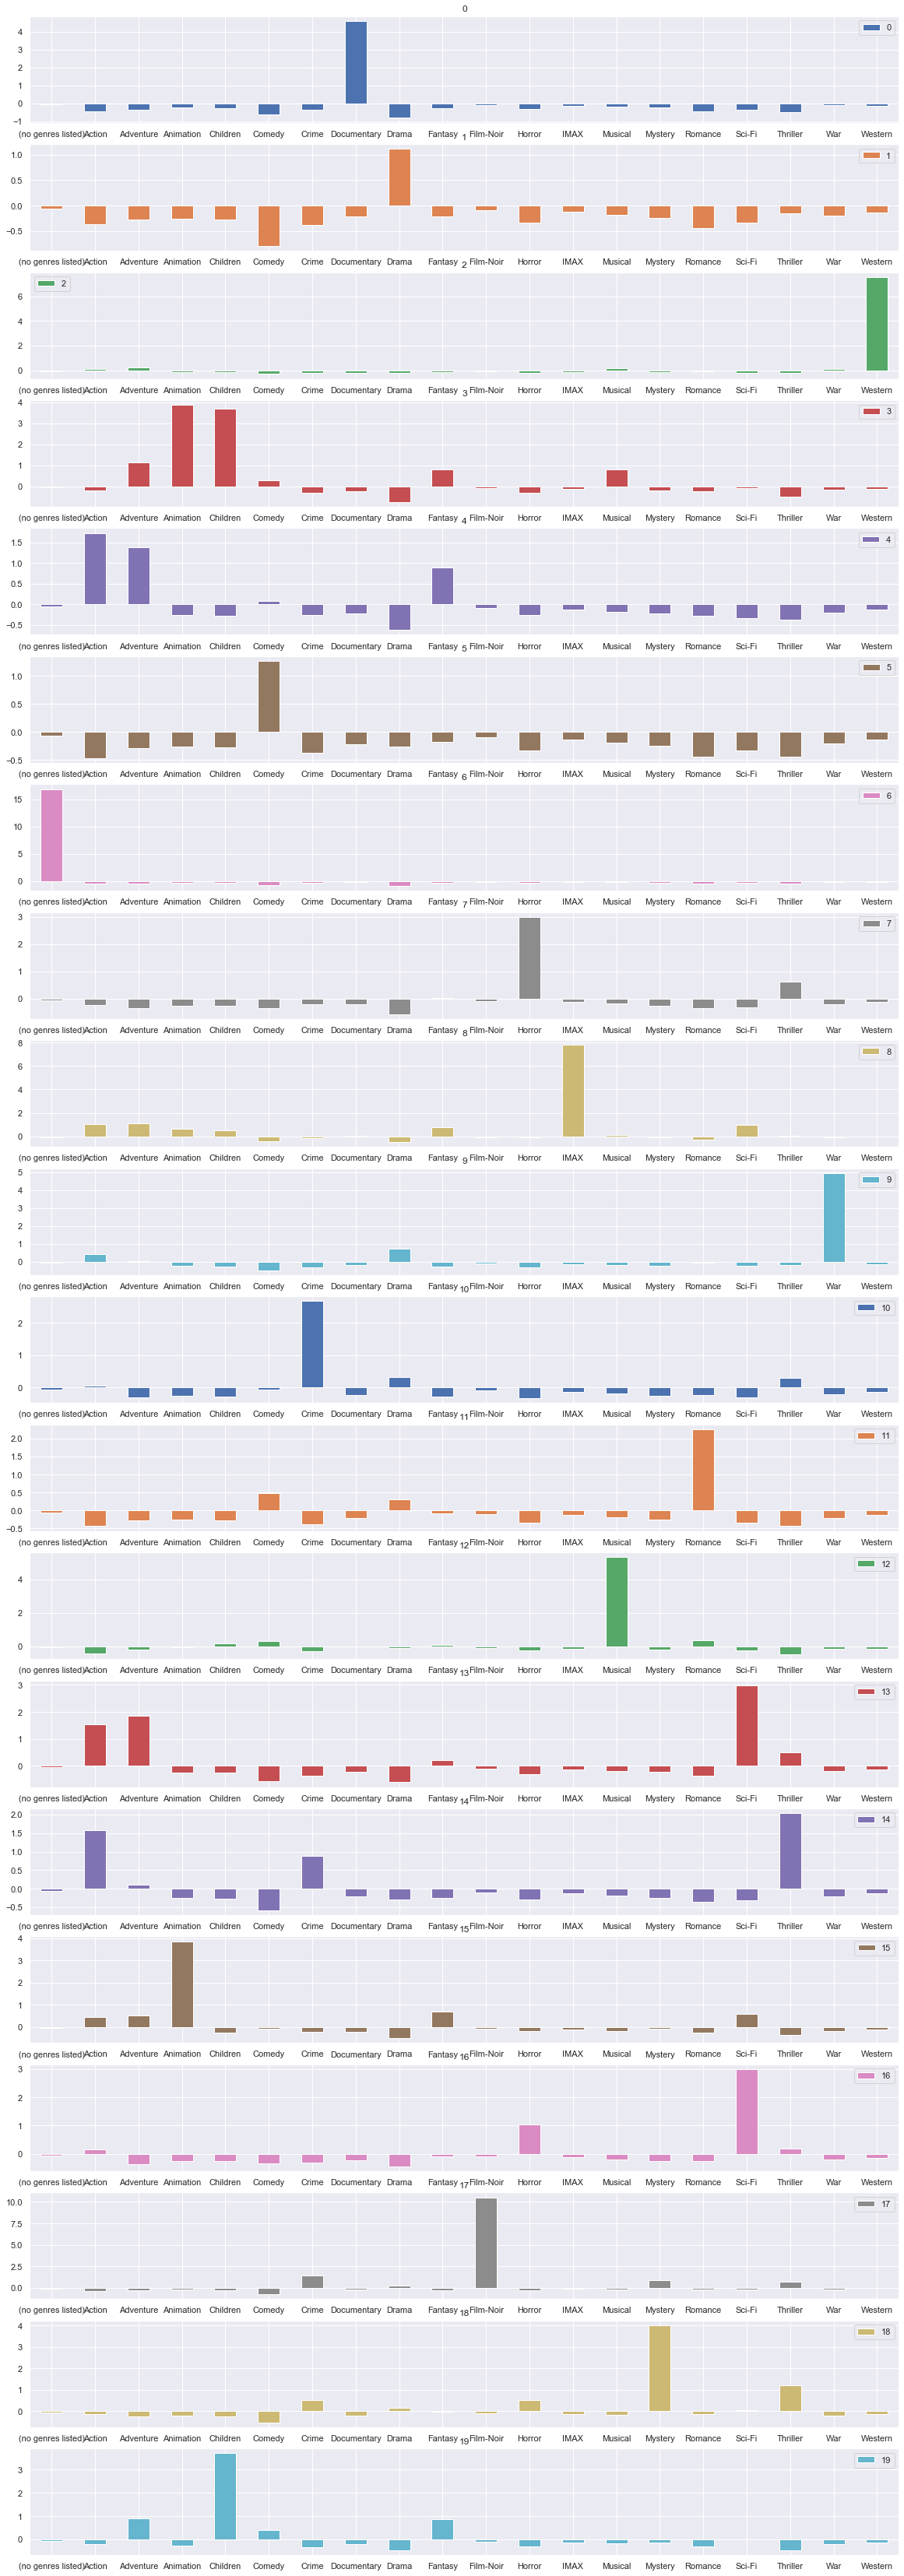

In [38]:
grupos4 = pd.DataFrame(modelo4.cluster_centers_, columns = generos.columns)
graph = grupos3.transpose().plot.bar(figsize = (20,60), subplots = True, sharex = False, rot = 0)

In [26]:
grupo = 15
dados_filmes[modelo3.labels_ == grupo].sample(10)

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
5685,27728,Ghost in the Shell 2: Innocence (a.k.a. Innoce...,Action|Animation|Drama|Sci-Fi|Thriller,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0
5187,8426,Robot Carnival (Roboto kÃ¢nibauru) (1987),Animation|Comedy|Drama|Fantasy|Sci-Fi,0,0,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
870,1151,Lesson Faust (1994),Animation|Comedy|Drama|Fantasy,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9509,170957,Cars 3 (2017),Adventure|Animation|Comedy,0,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7148,71484,Metropia (2009),Animation|Sci-Fi,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8492,113374,"Old Lady and the Pigeons, The (La vieille dame...",Animation|Comedy,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9460,168218,Kizumonogatari III: Cold Blood (2017),Animation|Fantasy|Mystery,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5792,31660,Steamboy (SuchÃ®mubÃ´i) (2004),Action|Animation|Drama|Sci-Fi,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8355,108795,Wonder Woman (2009),Action|Adventure|Animation|Fantasy,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9429,166291,A Silent Voice (2016),Animation|Drama|Romance,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [27]:
from sklearn.cluster import AgglomerativeClustering

In [32]:
modelo5 = AgglomerativeClustering(n_clusters = 17)
grupos5 = modelo5.fit_predict(generos_escalados)
grupos5

array([ 2, 14, 13, ...,  0,  2,  3], dtype=int64)

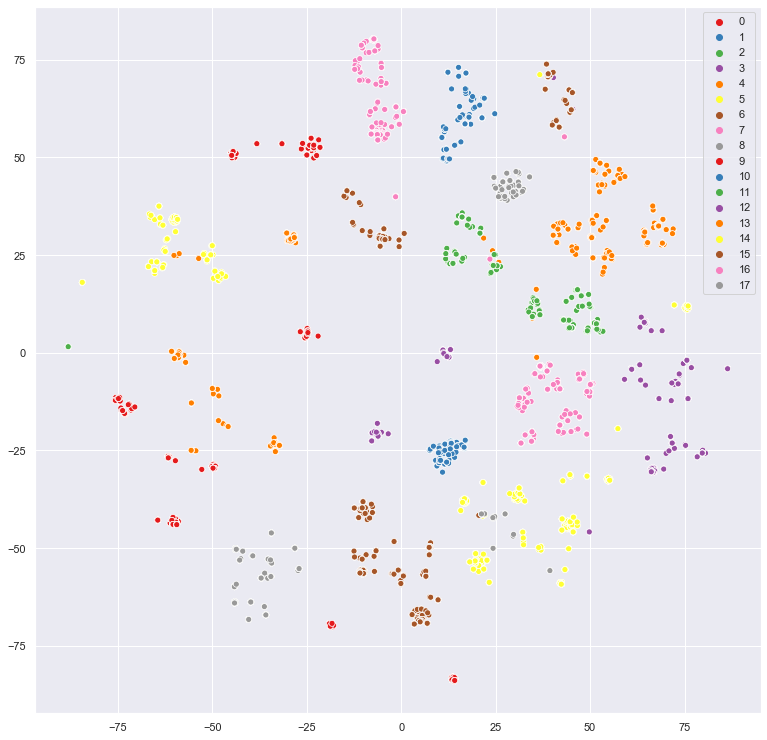

In [33]:
import seaborn as sns

sns.set(rc={'figure.figsize':(13,13)})
sns.scatterplot(x = visualizacao[:,0], y = visualizacao[:,1], 
                hue = grupos5, palette = sns.color_palette('Set1',17))

In [30]:
from scipy.cluster.hierarchy import dendrogram, linkage

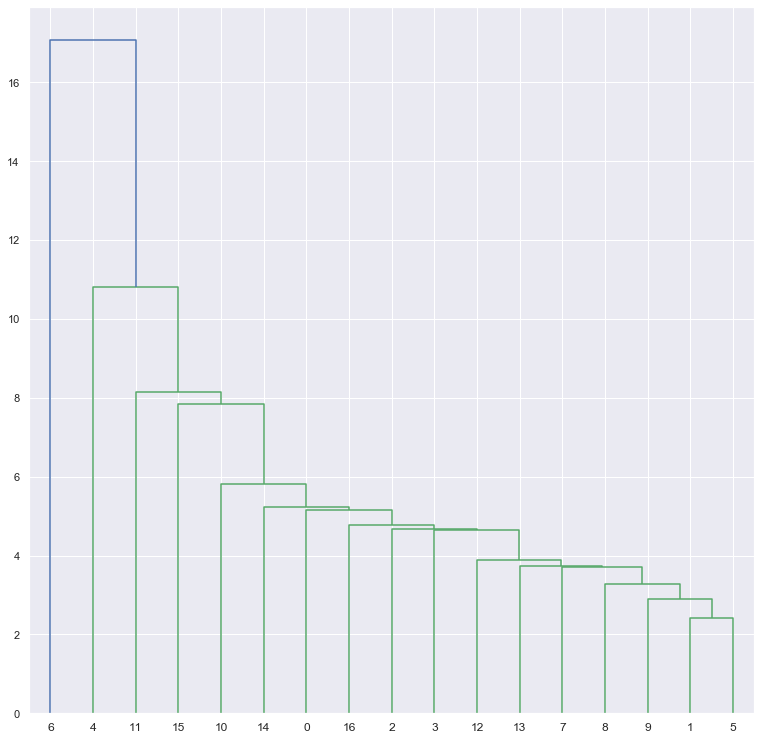

In [39]:
matriz_distancia = linkage(grupos4)
dendro = dendrogram(matriz_distancia)

In [40]:
from sklearn.cluster import DBSCAN

In [47]:
modelo6 = DBSCAN()
grupos6 = modelo6.fit_predict(dados)

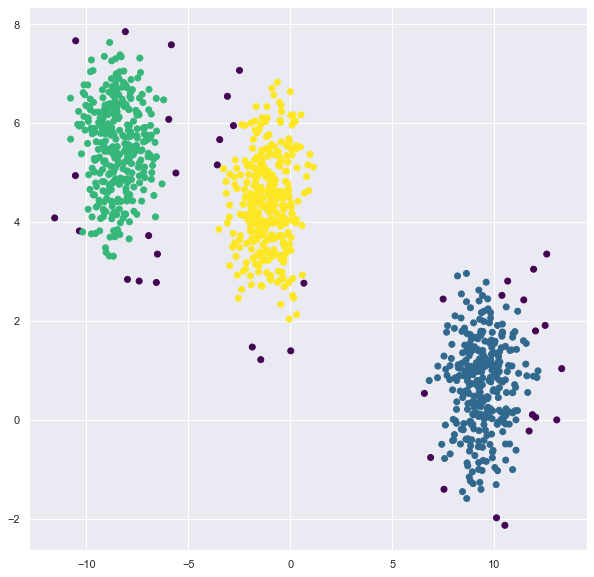

In [48]:
plt.figure(figsize=(10,10))
plt.scatter(x=dados.coluna1, y=dados.coluna2, 
            c=grupos6,
           cmap='viridis')

In [50]:
list(grupos6).count(-1)

40